In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [90]:
def create_dataset():
    df = pd.read_csv('datasets/iris.data', header=None)

    X = df.drop(labels=4, axis=1)
    Y = df[4]

    encoder = LabelEncoder()
    encoder.fit(Y)
    encoded_Y = encoder.transform(Y)
    dummy_y = to_categorical(encoded_Y)

    X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.2, random_state=42)
    
    return df, X_train, X_test, y_train, y_test

In [91]:
df, X_train, X_test, y_train, y_test = create_dataset()

df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [92]:
type(create_dataset()[1])

pandas.core.frame.DataFrame

In [105]:
def create_error_report(dataset=create_dataset(), input_c: int = 4, output_c: int = 3, loss: str = 'categorical_crossentropy', metrics: str = 'accuracy', optimizer: str = 'adam', epochs: int = 75, batch_size: int = 10, validation_split: float = 0.1):
    X_train_in = dataset[1]
    y_train_in = dataset[3]
    
    model = Sequential()
    model.add(Dense(input_c, activation='relu'))
    model.add(Dense(output_c, activation='softmax'))

    model.compile(loss=loss, optimizer=optimizer, metrics=[metrics])

    history = model.fit(X_train_in, y_train_in, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
    history_df = pd.DataFrame(history.history)

    fig, axes = plt.subplots(1, 2, figsize=(15,7))

    sns.lineplot(data=history_df[metrics], ax=axes[0])
    axes[0].set_title('Accuracy')
    
    sns.lineplot(data=history_df['loss'], ax=axes[1])
    axes[1].set_title('Loss')
    
    model.evaluate(X_test, y_test)

    
    return history_df
    

Epoch 1/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3186 - loss: 1.9944 - val_accuracy: 0.1667 - val_loss: 2.2662
Epoch 2/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3225 - loss: 1.8586 - val_accuracy: 0.1667 - val_loss: 2.0922
Epoch 3/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3734 - loss: 1.5446 - val_accuracy: 0.1667 - val_loss: 1.9615
Epoch 4/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3227 - loss: 1.5815 - val_accuracy: 0.1667 - val_loss: 1.8598
Epoch 5/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3443 - loss: 1.4813 - val_accuracy: 0.1667 - val_loss: 1.7790
Epoch 6/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3246 - loss: 1.4906 - val_accuracy: 0.1667 - val_loss: 1.7038
Epoch 7/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3781 - loss: 1.3795 - val_accuracy: 0.1667 - val_loss: 1.6447
Epoch 8/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4073 - loss: 1.1929 - val_accuracy: 0.1667 - val_loss

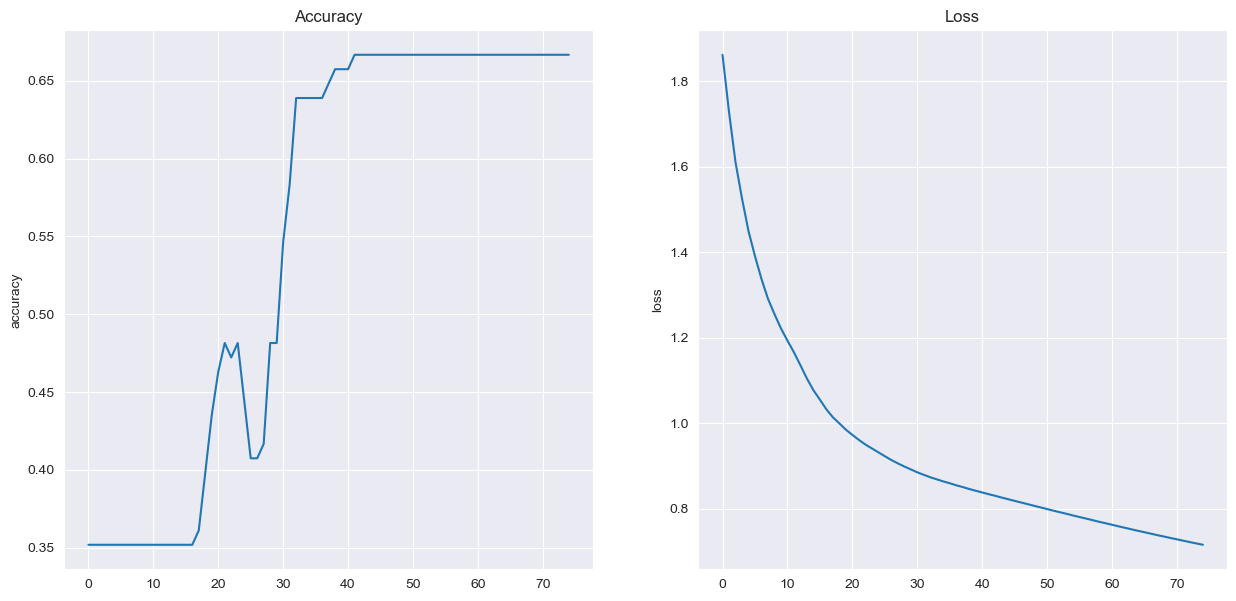

In [94]:
history_df = create_error_report()


In [95]:
history_df

,accuracy,loss,val_accuracy,val_loss
0,0.351852,1.861258,0.166667,2.266174
1,0.351852,1.727774,0.166667,2.092184
2,0.351852,1.610291,0.166667,1.961541
3,0.351852,1.525448,0.166667,1.859787
4,0.351852,1.449207,0.166667,1.778974
...,...,...,...,...
70,0.666667,0.728447,0.583333,0.849098
71,0.666667,0.725222,0.583333,0.847213
72,0.666667,0.721980,0.583333,0.844242
73,0.666667,0.718861,0.583333,0.841672


Epoch 1/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3040 - loss: 2.2380 - val_accuracy: 0.1667 - val_loss: 2.3265
Epoch 2/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3740 - loss: 2.0144 - val_accuracy: 0.0833 - val_loss: 2.1333
Epoch 3/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2092 - loss: 1.9241 - val_accuracy: 0.1667 - val_loss: 1.9660
Epoch 4/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0882 - loss: 1.6162 - val_accuracy: 0.0833 - val_loss: 1.8345
Epoch 5/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0599 - loss: 1.7615 - val_accuracy: 0.0833 - val_loss: 1.7052
Epoch 6/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0635 - loss: 1.6998 - val_accuracy: 0.0833 - val_loss: 1.5989
Epoch 7/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0798 - loss: 1.5682 - val_accuracy: 0.1667 - val_loss: 1.5199
Epoch 8/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1411 - loss: 1.4528 - val_accuracy: 0.3333 - val_loss

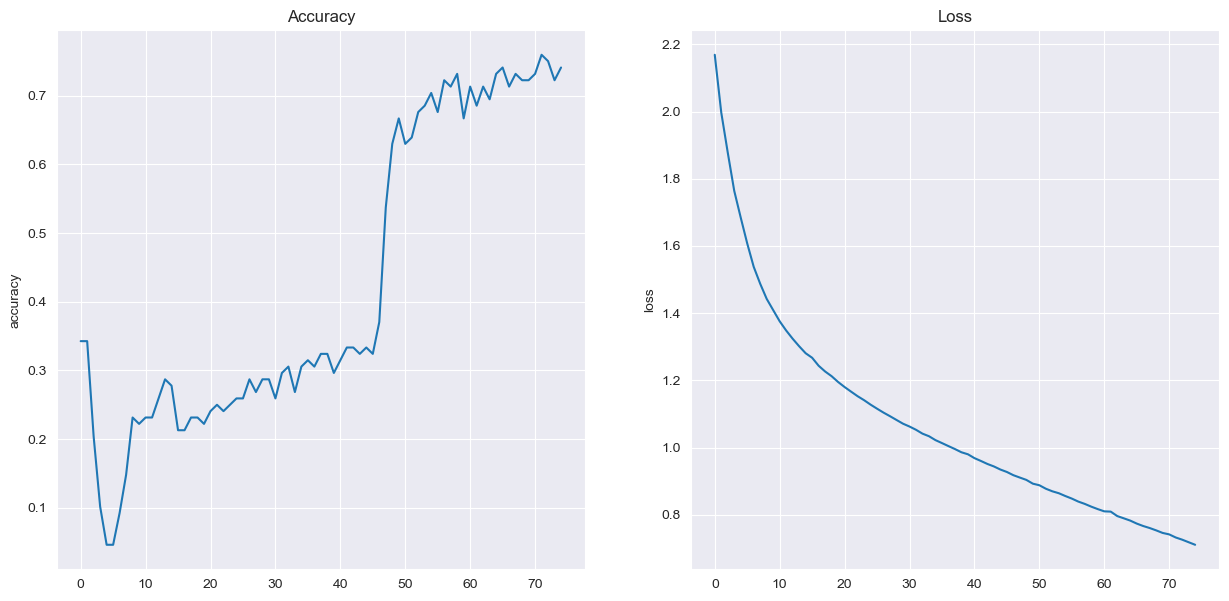

In [96]:
history_df = create_error_report(input_c=7)

Epoch 1/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - AUC: 0.4958 - loss: 2.0503 - val_AUC: 0.5729 - val_loss: 1.5527
Epoch 2/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.4898 - loss: 1.7070 - val_AUC: 0.5729 - val_loss: 1.3806
Epoch 3/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.5310 - loss: 1.4209 - val_AUC: 0.5729 - val_loss: 1.2544
Epoch 4/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.5323 - loss: 1.2864 - val_AUC: 0.5608 - val_loss: 1.1684
Epoch 5/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.5350 - loss: 1.2046 - val_AUC: 0.4965 - val_loss: 1.1132
Epoch 6/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.5013 - loss: 1.1444 - val_AUC: 0.4844 - val_loss: 1.0812
Epoch 7/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.5190 - loss: 1.0646 - val_AUC: 0.5017 - val_loss: 1.0647
Epoch 8/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.5591 - loss: 1.0393 - val_AUC: 0.5139 - val_loss: 1.0526
Epoch 9/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6384 - loss:

,AUC,loss,val_AUC,val_loss
0,0.508402,1.905377,0.572917,1.552671
1,0.502208,1.631290,0.572917,1.380636
2,0.509152,1.451889,0.572917,1.254402
3,0.507309,1.313405,0.560764,1.168418
4,0.517747,1.206863,0.496528,1.113242
...,...,...,...,...
70,0.932420,0.488993,0.781250,0.655369
71,0.935121,0.486206,0.777778,0.651902
72,0.936407,0.480339,0.782986,0.648885
73,0.935507,0.477694,0.786458,0.645008


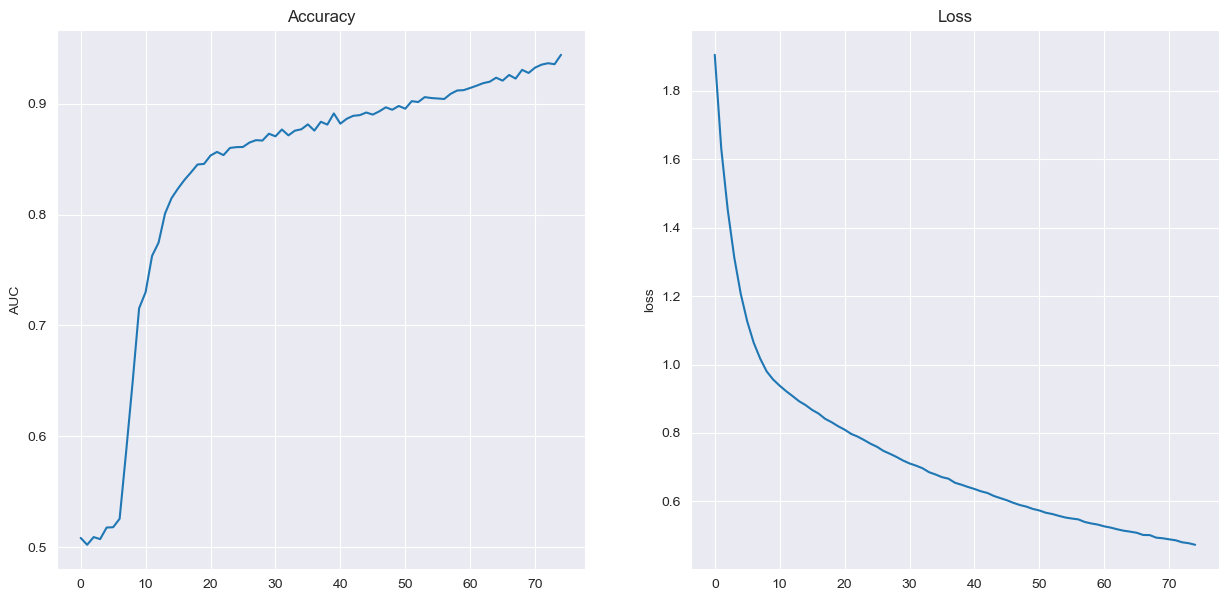

In [97]:
create_error_report(input_c=7, optimizer='RMSprop', metrics='AUC')

Epoch 1/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - AUC: 0.3610 - loss: 1.4298 - val_AUC: 0.3733 - val_loss: 1.2688
Epoch 2/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.4211 - loss: 1.2075 - val_AUC: 0.4410 - val_loss: 1.1689
Epoch 3/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.5108 - loss: 1.1094 - val_AUC: 0.4323 - val_loss: 1.1470
Epoch 4/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.5880 - loss: 1.0728 - val_AUC: 0.4028 - val_loss: 1.1263
Epoch 5/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.5788 - loss: 1.0627 - val_AUC: 0.3542 - val_loss: 1.1128
Epoch 6/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.5449 - loss: 1.0298 - val_AUC: 0.3090 - val_loss: 1.0951
Epoch 7/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6138 - loss: 1.0107 - val_AUC: 0.3333 - val_loss: 1.0830
Epoch 8/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6757 - loss: 0.9681 - val_AUC: 0.5260 - val_loss: 1.0472
Epoch 9/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7151 - loss:

,AUC,loss,val_AUC,val_loss
0,0.346236,1.397097,0.373264,1.268843
1,0.465299,1.158298,0.440972,1.168868
2,0.529814,1.096291,0.432292,1.147036
3,0.591500,1.067127,0.402778,1.126285
4,0.607339,1.039898,0.354167,1.112844
...,...,...,...,...
70,0.888546,0.569262,0.826389,0.713824
71,0.894976,0.567632,0.826389,0.711805
72,0.893883,0.566114,0.826389,0.710033
73,0.890689,0.564535,0.826389,0.708092


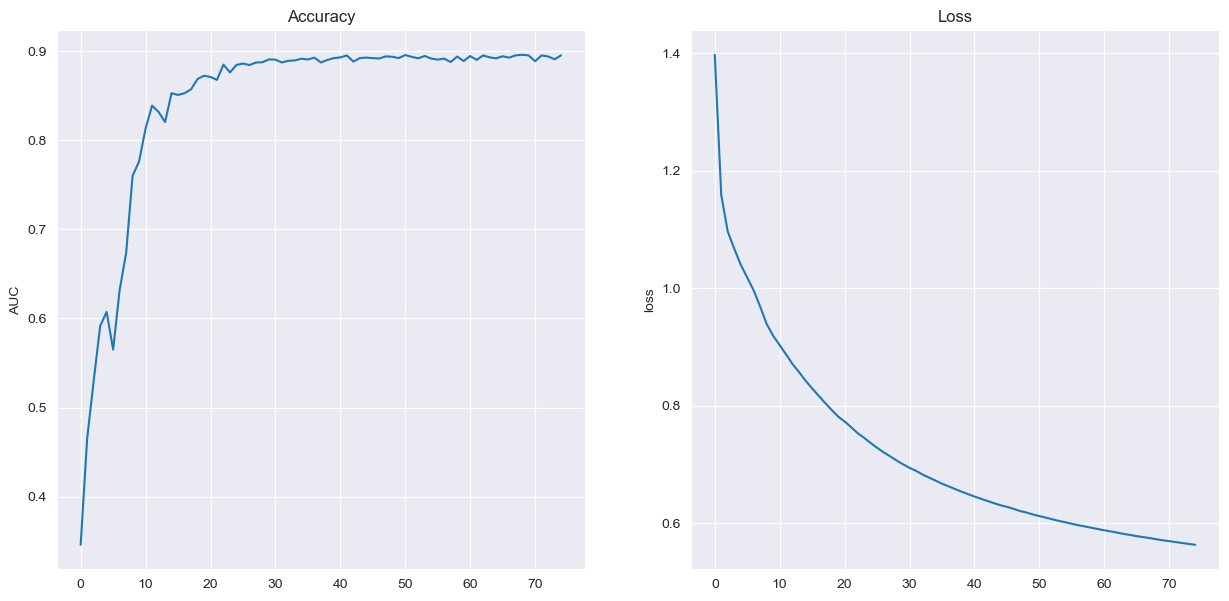

In [98]:
create_error_report(input_c=7, optimizer='SGD', metrics='AUC')

Epoch 1/75
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 0.4479 - loss: 1.6561 - val_AUC: 0.3299 - val_loss: 1.2502
Epoch 2/75
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.3231 - loss: 1.2669 - val_AUC: 0.3663 - val_loss: 1.1746
Epoch 3/75
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.3175 - loss: 1.2082 - val_AUC: 0.4931 - val_loss: 1.1390
Epoch 4/75
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.4202 - loss: 1.1693 - val_AUC: 0.4878 - val_loss: 1.1452
Epoch 5/75
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.3605 - loss: 1.1697 - val_AUC: 0.5104 - val_loss: 1.1233
Epoch 6/75
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.4191 - loss: 1.1628 - val_AUC: 0.4809 - val_loss: 1.1238
Epoch 7/75
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.4179 - loss: 1.1503 - val_AUC: 0.4722 - val_loss: 1.1102
Epoch 8/75
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.4180 - loss: 1.1418 - val_AUC: 0.4740 - val_loss: 1.1045
Epoch 9/75
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.4250 - loss: 1.1351 - val_AUC:

,AUC,loss,val_AUC,val_loss
0,0.431113,1.527499,0.329861,1.250220
1,0.313636,1.269515,0.366319,1.174625
2,0.321159,1.208947,0.493056,1.138984
3,0.388375,1.188652,0.487847,1.145160
4,0.336398,1.178026,0.510417,1.123340
...,...,...,...,...
70,0.770619,0.938674,0.829861,0.914421
71,0.750300,0.932200,0.829861,0.907892
72,0.763953,0.923356,0.822917,0.900559
73,0.761381,0.918092,0.829861,0.894397


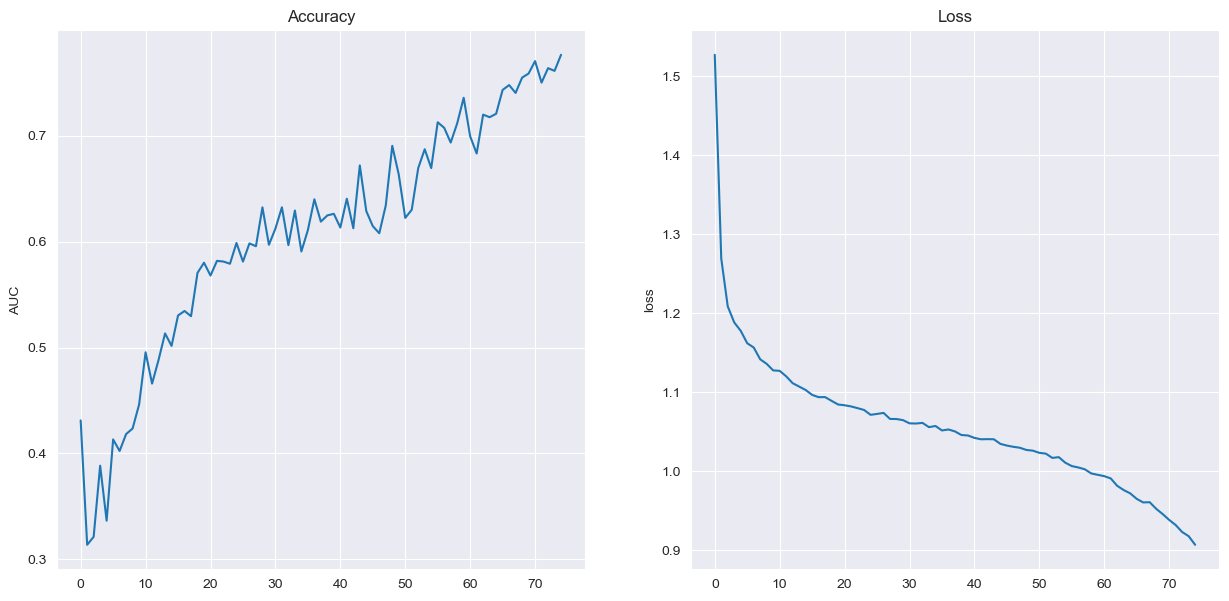

In [99]:
create_error_report(input_c=7, optimizer='SGD', metrics='AUC', batch_size=20)

Epoch 1/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - AUC: 0.6592 - loss: 1.2262 - val_AUC: 0.6528 - val_loss: 1.2792
Epoch 2/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - AUC: 0.6886 - loss: 1.1735 - val_AUC: 0.6719 - val_loss: 1.2269
Epoch 3/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.7035 - loss: 1.1527 - val_AUC: 0.6753 - val_loss: 1.1896
Epoch 4/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.7453 - loss: 1.0958 - val_AUC: 0.6736 - val_loss: 1.1532
Epoch 5/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - AUC: 0.7367 - loss: 1.0852 - val_AUC: 0.6372 - val_loss: 1.1308
Epoch 6/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.7474 - loss: 1.0480 - val_AUC: 0.5573 - val_loss: 1.1056
Epoch 7/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - AUC: 0.7269 - loss: 1.0232 - val_AUC: 0.5330 - val_loss: 1.0912
Epoch 8/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.7154 - loss: 1.0048 - val_AUC: 0.5139 - val_loss: 1.0788
Epoch 9/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.6977 - loss: 1.0029 -

,AUC,loss,val_AUC,val_loss
0,0.658500,1.222413,0.652778,1.279194
1,0.688100,1.169050,0.671875,1.226886
2,0.723294,1.127971,0.675347,1.189591
3,0.747921,1.093809,0.673611,1.153171
4,0.753386,1.067588,0.637153,1.130850
...,...,...,...,...
70,0.954475,0.744634,0.923611,0.853986
71,0.947209,0.742703,0.927083,0.849791
72,0.958548,0.738746,0.927083,0.847653
73,0.959598,0.735415,0.925347,0.845941


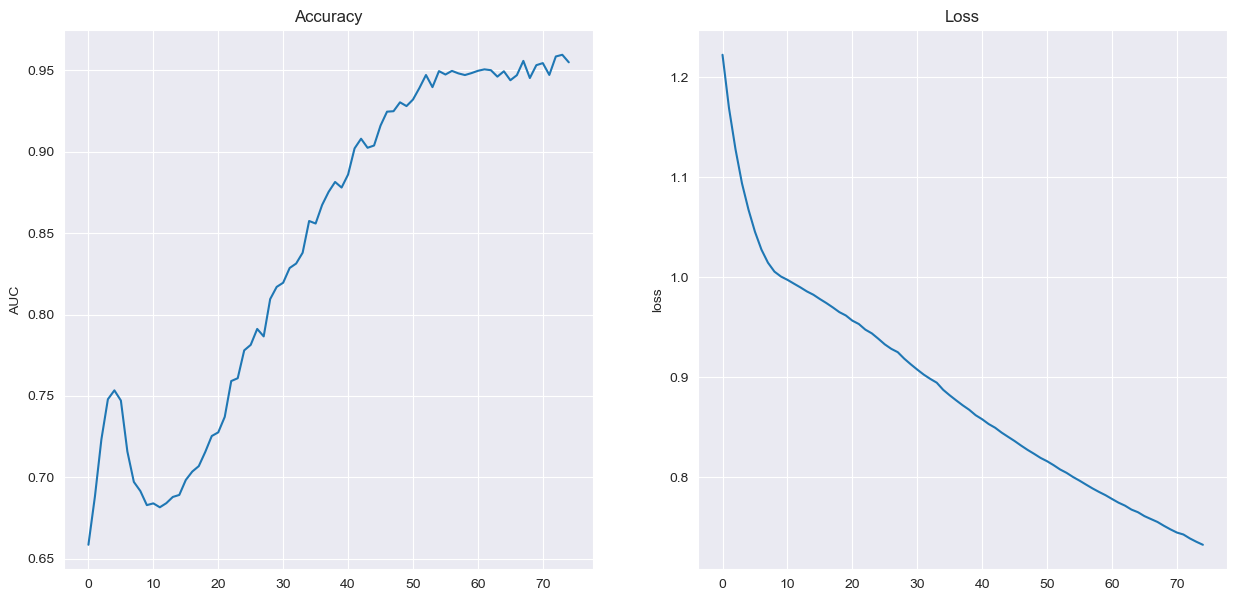

In [100]:
create_error_report(input_c=7, optimizer='SGD', metrics='AUC', batch_size=65)

Epoch 1/75
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - AUC: 0.6031 - loss: 1.2254 - val_AUC: 0.5365 - val_loss: 1.1078
Epoch 2/75
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.6835 - loss: 1.0016 - val_AUC: 0.6875 - val_loss: 1.0100
Epoch 3/75
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.6909 - loss: 0.9994 - val_AUC: 0.7170 - val_loss: 0.9674
Epoch 4/75
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7821 - loss: 0.9367 - val_AUC: 0.7431 - val_loss: 0.9394
Epoch 5/75
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7696 - loss: 0.9417 - val_AUC: 0.7517 - val_loss: 0.9076
Epoch 6/75
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7843 - loss: 0.9034 - val_AUC: 0.7639 - val_loss: 0.8796
Epoch 7/75
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.8135 - loss: 0.8677 - val_AUC: 0.8194 - val_loss: 0.8583
Epoch 8/75
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.8321 - loss: 0.8369 - val_AUC: 0.8247 - val_loss: 0.8319
Epoch 9/75
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.8691 - loss: 

,AUC,loss,val_AUC,val_loss
0,0.534958,1.217505,0.536458,1.107823
1,0.655671,1.030627,0.687500,1.010014
2,0.714978,0.971963,0.717014,0.967424
3,0.753751,0.943325,0.743056,0.939441
4,0.786908,0.915071,0.751736,0.907638
...,...,...,...,...
70,0.997814,0.292285,0.996528,0.295149
71,0.996742,0.272425,0.916667,0.472145
72,0.995949,0.285461,0.991319,0.316469
73,0.993656,0.280272,0.996528,0.294669


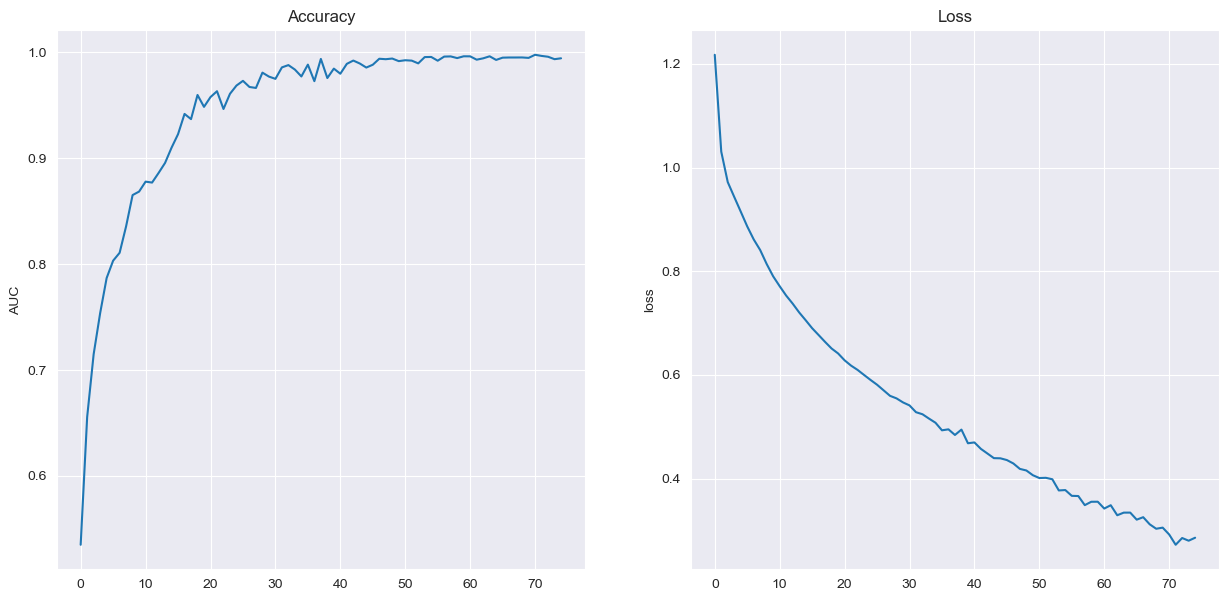

In [101]:
create_error_report(input_c=7, optimizer='SGD', metrics='AUC', batch_size=5)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - AUC: 0.4971 - loss: 3.4426 - val_AUC: 0.5069 - val_loss: 1.1480
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.6349 - loss: 1.0743 - val_AUC: 0.7396 - val_loss: 0.9574
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.6501 - loss: 0.9836 - val_AUC: 0.7830 - val_loss: 0.8988
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7434 - loss: 0.9302 - val_AUC: 0.8299 - val_loss: 0.9165
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7854 - loss: 0.9051 - val_AUC: 0.8542 - val_loss: 0.8435
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.8882 - loss: 0.7955 - val_AUC: 0.8490 - val_loss: 0.8083
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.8963 - loss: 0.7296 - val_AUC: 0.8594 - val_loss: 0.7479
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9027 - loss: 0.6756 - val_AUC: 0.9028 - val_loss: 0.7067
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9005

,AUC,loss,val_AUC,val_loss
0,0.531400,2.275508,0.506944,1.147984
1,0.643068,1.047698,0.739583,0.957398
2,0.710134,0.973046,0.782986,0.898772
3,0.803048,0.903473,0.829861,0.916545
4,0.836913,0.857946,0.854167,0.843509
...,...,...,...,...
95,0.995778,0.133925,1.000000,0.086979
96,0.997664,0.123267,1.000000,0.083169
97,0.996764,0.124933,1.000000,0.128011
98,0.996485,0.124035,1.000000,0.087785


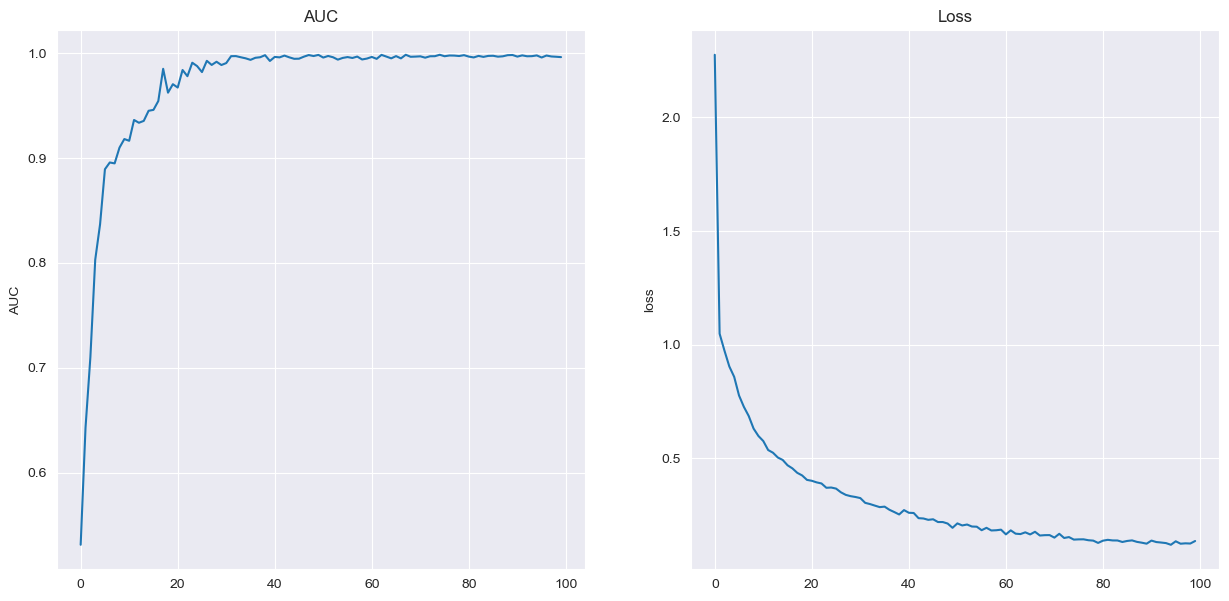

In [107]:
create_error_report(input_c=7, optimizer='SGD', metrics='AUC', batch_size=5, epochs=100)